In [88]:
#import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.data as skd

# Visulizing dyad

### Consider an image from skimage.data. For simplicity, say that X $\in R^{mn}$ is the matrix representing that image. You are asked to visualize the dyad of the SVD Decomposition of X and the result of compressing the image via SVD. In particular:

#### 1. Load the image into memory and compute its SVD

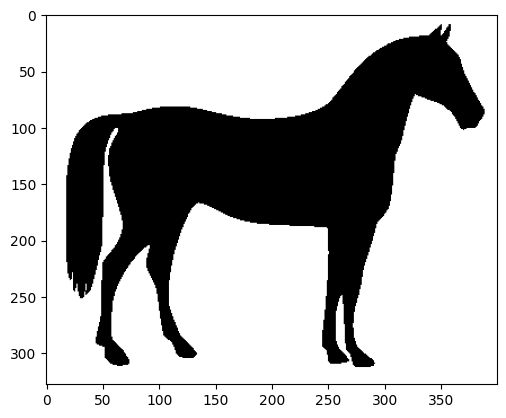

u.shape:(328, 328), s.shape:(328,), v.shape:(400, 400)


In [89]:
#Load data into memory

img = skd.horse() 
plt.imshow(img, cmap = 'gray')
plt.show()

U, S, VT = np.linalg.svd(img)

print(f'u.shape:{U.shape}, s.shape:{S.shape}, v.shape:{VT.shape}')

#### 2. Visualize some of the dyad $\sigma_i$ $u_i$ $v^T_i$ of this decomposition. What do you notice?

k: 0


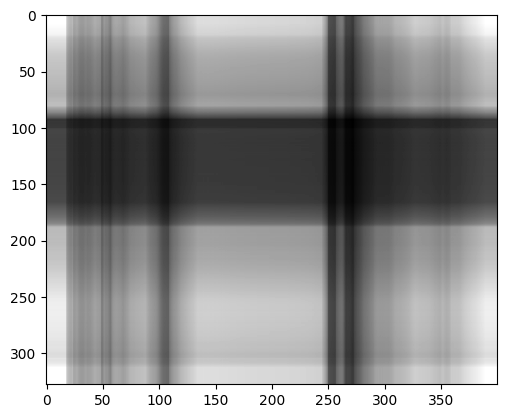

k: 1


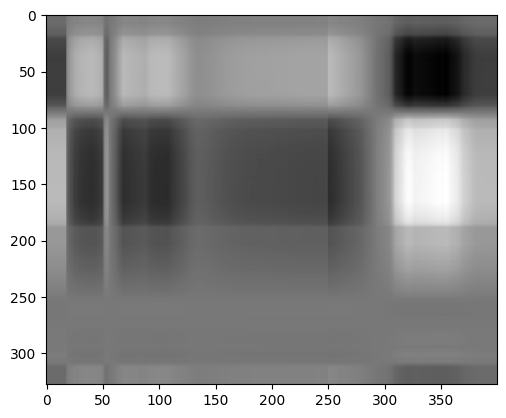

k: 2


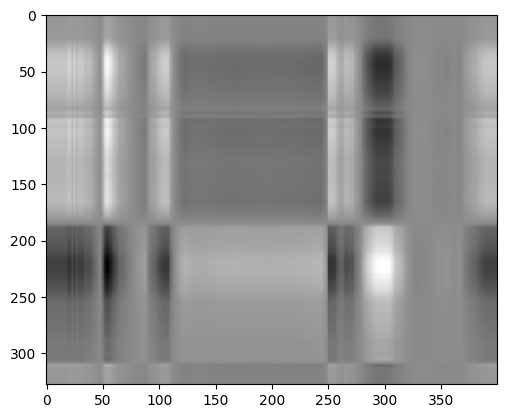

k: 3


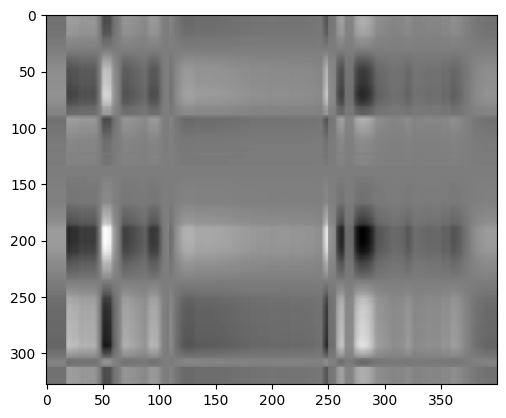

k: 4


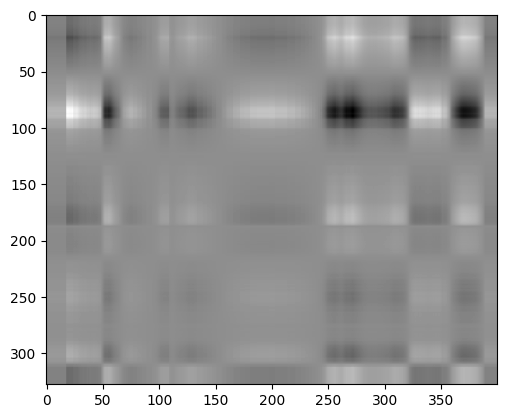

k: 5


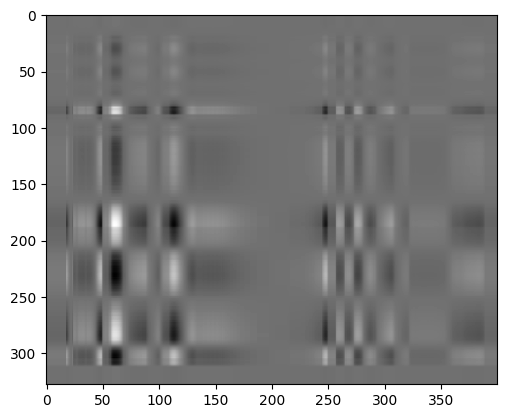

k: 6


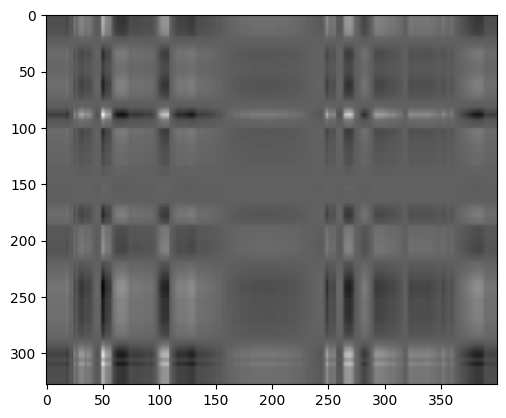

k: 7


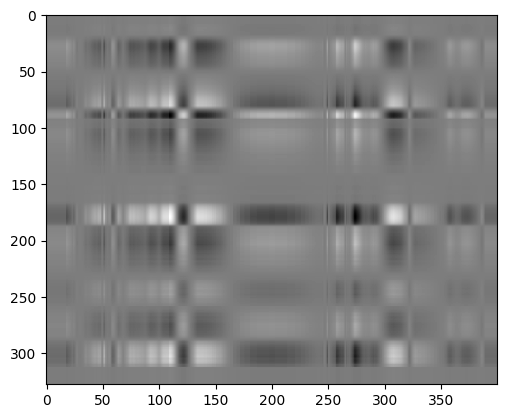

k: 8


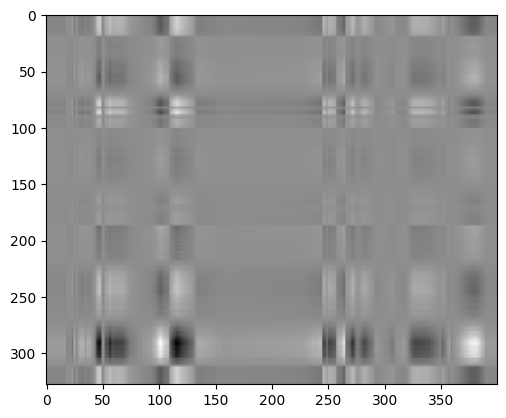

k: 9


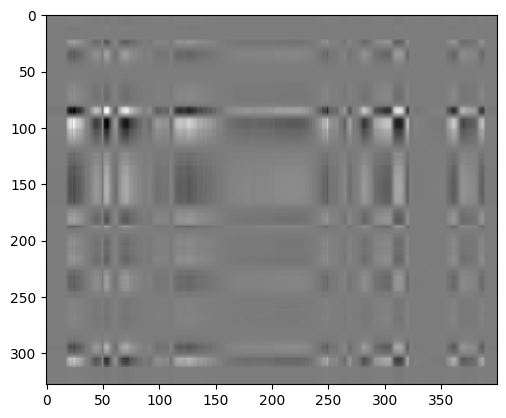

In [90]:
def calculate_dyad(U, VT, i):
    U_i = U[:, i].reshape(len(U[0]), 1)
    VT_i = VT[i, :].reshape(1, len(VT[0]))
    A_i = U_i @ VT_i 

    return A_i


for k in range(10):
    A_i = calculate_dyad(U, VT, k)
    plt.imshow(A_i, cmap='gray')
    print(f"k: {k}")
    plt.show()


#### 3. Plot the singular values of X. Do you note something?

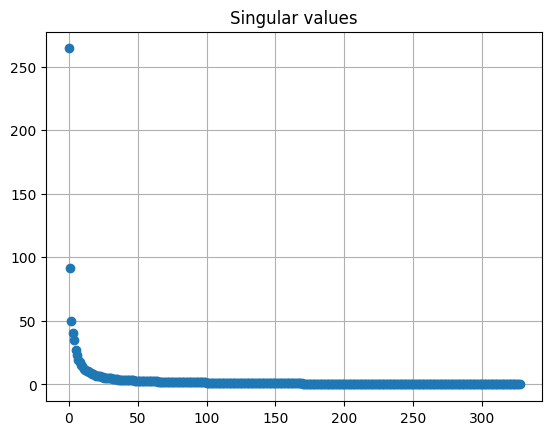

In [91]:
#S è il vettore colonna che contiene la diagonale si \sigma

plt.plot(S, 'o')
plt.title('Singular values')
plt.grid()
plt.show()

#### 4. Visualize the k-rank approximation of X for different values of k, What do you observe?

A_0


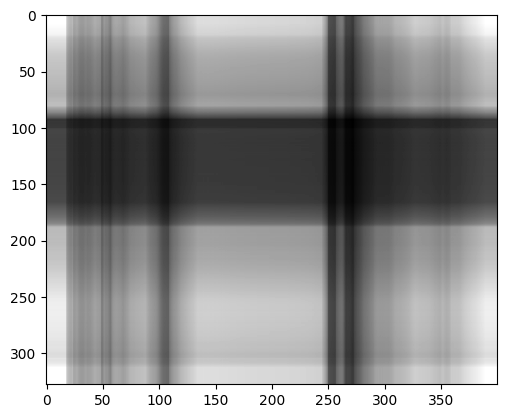

A_1


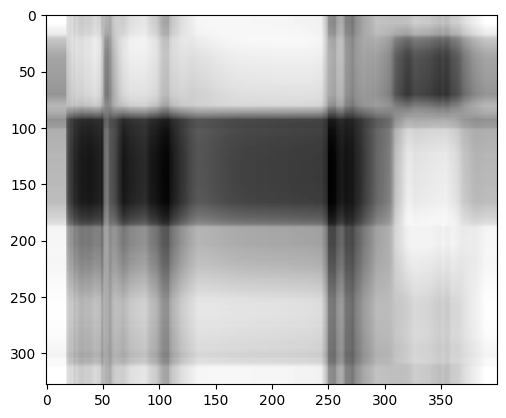

A_2


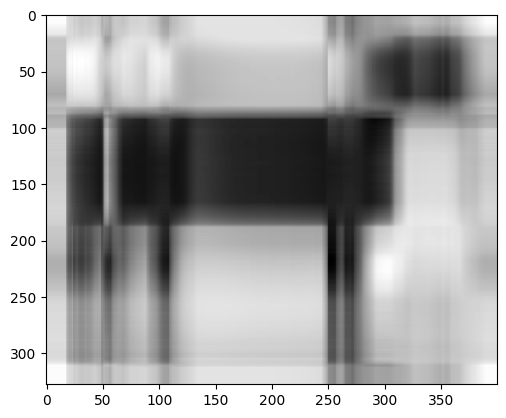

A_3


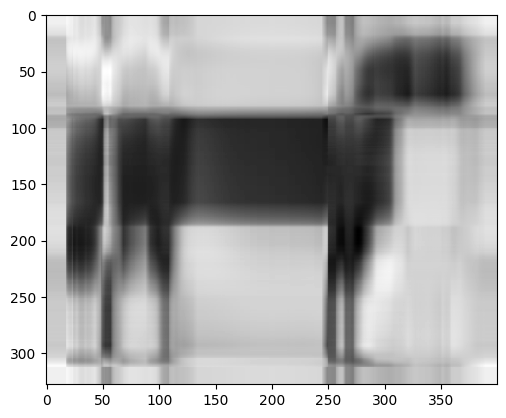

A_4


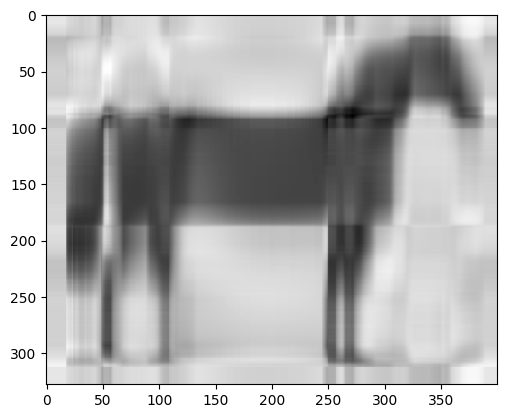

A_5


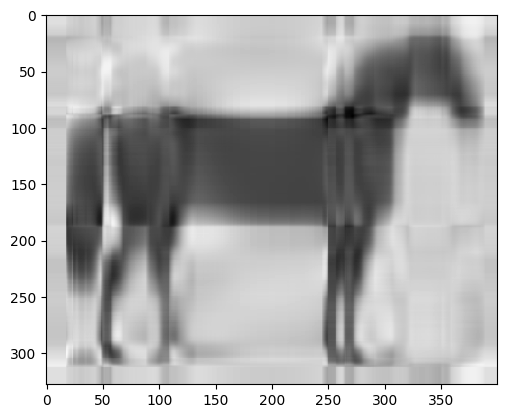

A_6


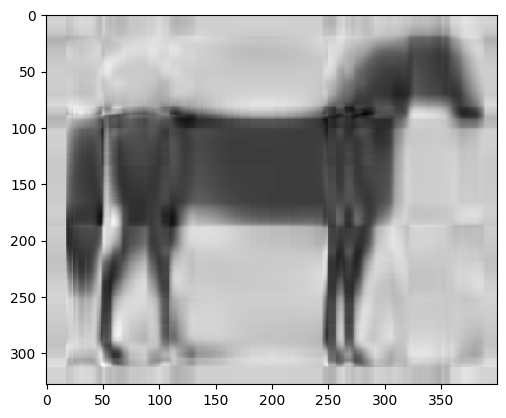

A_7


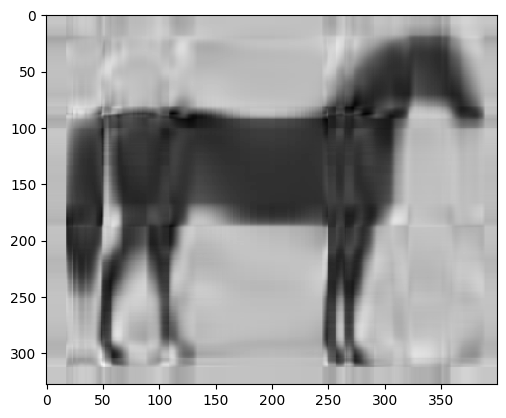

A_8


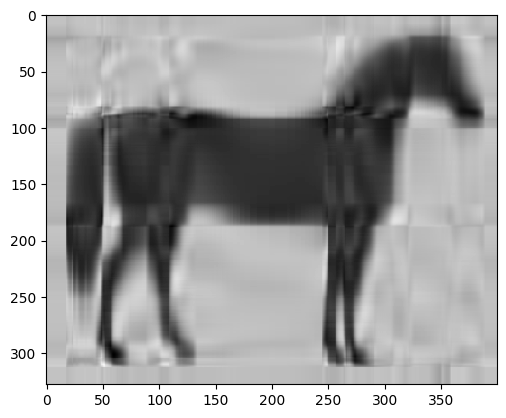

A_9


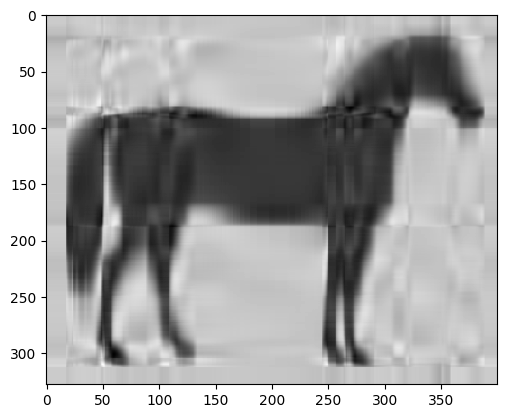

In [92]:
def calculate_appr(A_prev, U, S, VT, k):
    A_i = calculate_dyad(U, VT, k)
    S_i = S[k]    
    A_k = A_prev + A_i*S_i

    return A_k

A_k = np.zeros(img.shape)

for k in range (10):
    A_k = calculate_appr(A_k, U, S, VT, k)
    print(f"A_{k}")
    plt.imshow(A_k, cmap='gray')
    plt.show()

#### 5. Compute and plot the approximation error $||X - X_k||$ for increasing values of k, where $X_k$ is the k-rank approximation of k.

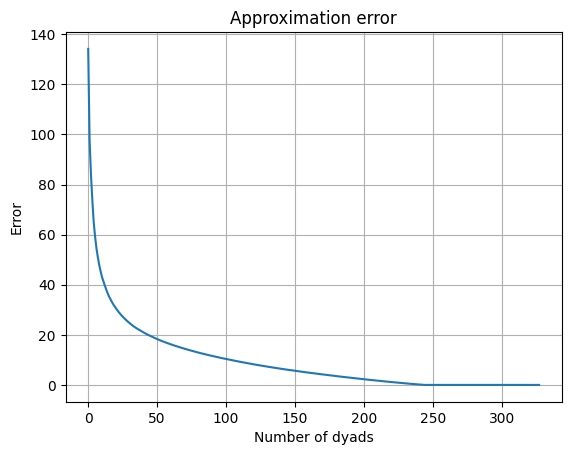

In [93]:
def approximation_error(A, A_k):
    error = np.linalg.norm(A - A_k)
    return error

A_k = np.zeros(img.shape)
k = np.arange(0, len(S))
error = []

for i in k:
    A_k = calculate_appr(A_k, U, S, VT, i)
    error.append(approximation_error(img, A_k))

plt.plot(k, error)
plt.title("Approximation error")
plt.xlabel('Number of dyads')
plt.ylabel('Error')
plt.grid()
plt.show()


#### 6. Plot the compression factor $\frac {k}{mn}$ for increasing k.

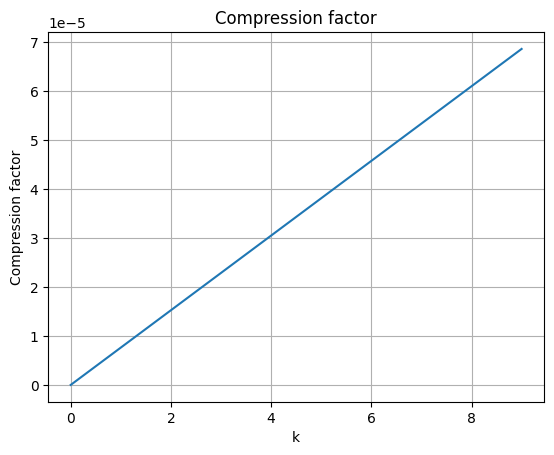

In [94]:
m, n = img.shape

def calculate_compresssion_factor(k, m, n):
    return k/(m*n)

compression_factor = []
k = np.arange(0, 10)

for i in k:
    c_f = calculate_compresssion_factor(i, m, n)
    compression_factor.append(c_f)

plt.plot(k, compression_factor)
plt.title("Compression factor")
plt.xlabel('k')
plt.ylabel('Compression factor')
plt.grid()
plt.show()
